# Erd&ouml;s-R&eacute;nyi (ER) Random Networks

We will start our description with the simplest random network model. Consider a social network, with $50$ students. Our network will have $50$ nodes, where each node represents a single student in the network. Edges in the social network represent whether or not a pair of students are friends. What is the simplest way we could describe whether two people are friends?

In this case, we have a yes or no question: are a pair of people friends, or are they not friends? In this case, the simplest possible thing to do would be to say, for any two students in our network, there is some probability (which we will call $p$) that describes how likely they are to be friends. In the below example, for the sake of argument, we will let $p=0.3$. What does a realization from this network look like?

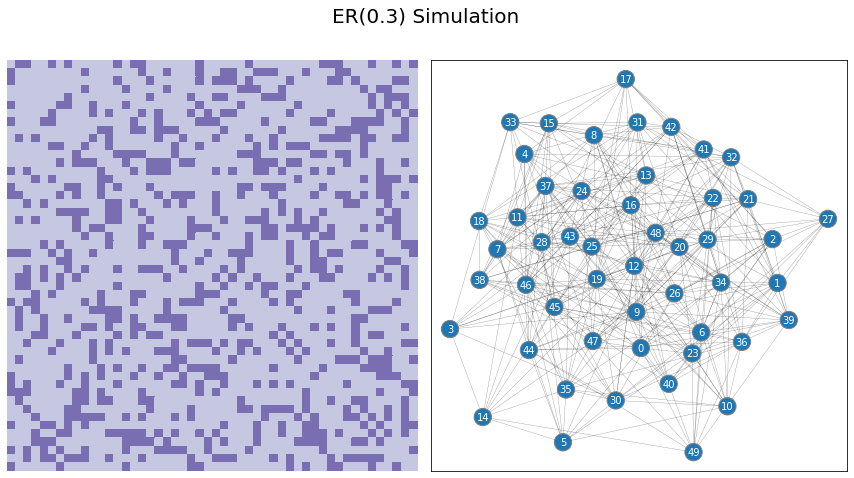

In [1]:
from graphbook_code import draw_multiplot
from graspologic.simulations import er_np

n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

draw_multiplot(A, title="ER(0.3) Simulation");

Using this example, now let's get down to business. This simple random network model is called the Erd&ouml;s R&eacute;nyi (ER) model<sup>1</sup>. The way we can think of the $ER$ network is that the edges basically depend *only* on a probability, $p$. We can think of this example as though a coin flip is performed, where the coin has a probability $p$ of landing on heads, and $1-p$ of landing on tails. For each edge in the network, we basically flip the coin, and if it lands on heads, the edge exists, and if it lands on tails (with probability $1-p$) the edge does not exist. If $\mathbf A$ is a random network which is ER with $n$ nodes and probability $p$, we will alternatively say that $\mathbf A$ is an $ER_n(p)$ random network. 

## Practical Utility

In practice, the ER model seems like it might be a little too simple to be useful. Why would it ever be useful to think that the best we can do to describe our network is to say that connections exist with some probability? Does this miss a *lot* of useful questions we might want to answer? Fortunately, there are a number of ways in which the simplicity of the ER model is useful. Given a probability and a number of nodes, we can easily describe the properties we would expect to see in a network if that network were ER. For instance, we know how many edges on average the nodes of an ER nework should have. We can reverse this idea, too: given a network we think might *not* be ER, we could check whether it's different in some way from a network which is ER. For instance, if we see that half the nodes have a ton of edges (meaning, they have a high degree), and half don't, we should probably use a more complicated model than an Erdos-Renyi. If this is the case, we might look for other models that could describe our network which are more complex.

In the next code block, we are going to sample a single ER network with $50$ nodes and an edge probability $p$ of $0.3$:

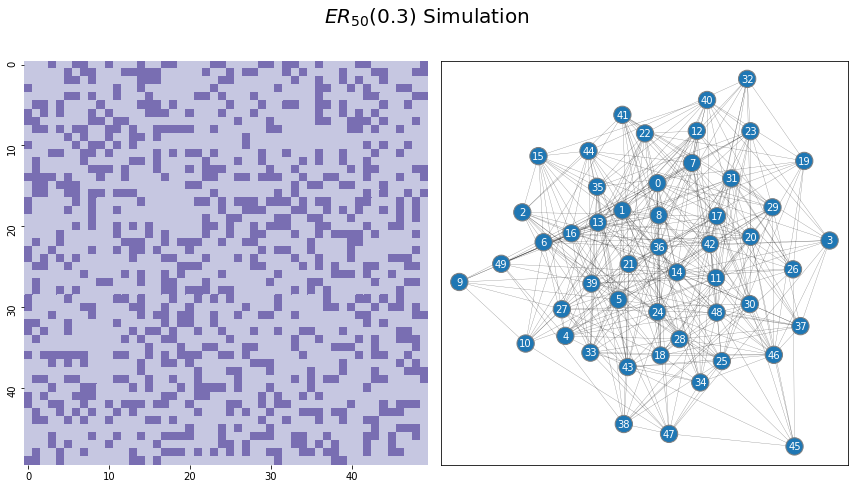

In [2]:
n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
draw_multiplot(A, title="$ER_{50}(0.3)$ Simulation", xticklabels=10, yticklabels=10);

Above, we visualize the network using a heatmap. The dark squares indicate that an edge exists between a pair of nodes, and white squares indicate that an edge does not exist between a pair of nodes.

Next, let's see what happens when we use a higher edge probability, like $p=0.7$:

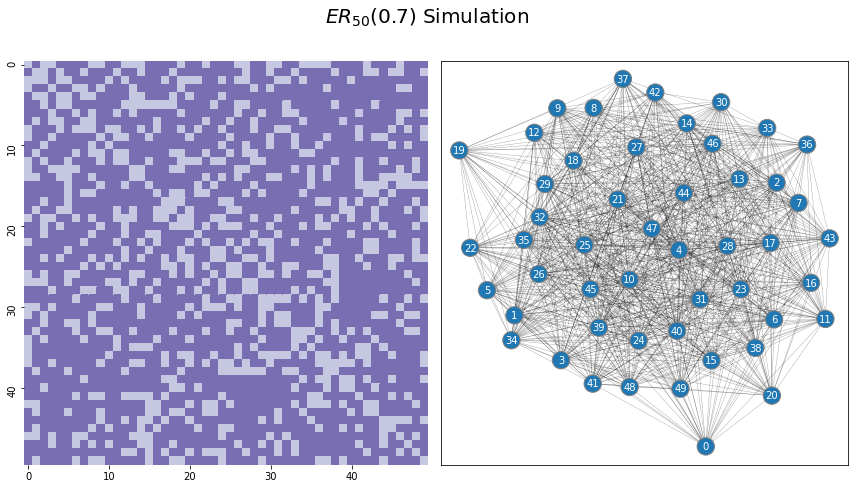

In [3]:
p = 0.7  # network has an edge probability of 0.7

# sample a single adjacency matrix from ER(50, 0.7)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
draw_multiplot(A, title="$ER_{50}(0.7)$ Simulation", xticklabels=10, yticklabels=10);

As the edge probability increases, the sampled adjacency matrix tends to indicate that there are more connections in the network. This is because there is a higher chance of an edge existing when $p$ is larger.

## References

[1] Erd&ouml;s P, R&eacute;nyi A. 1959. "On random graphs, I." Publ. Math. Debrecen 6:290–297.
